# Refugee Analysis
This notebook explores unhcr time series data to discover unique worldwide trends as well as 

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [13]:
all_time = pd.read_csv('./data/unhcr_popstats_export_time_series_all_data.csv',skiprows = 0)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
all_time.head()

,Year,Country / territory of asylum/residence,Origin,Population type,Value
0,1951,Australia,Various/Unknown,Refugees (incl. refugee-like situations),180000
1,1951,Austria,Various/Unknown,Refugees (incl. refugee-like situations),282000
2,1951,Belgium,Various/Unknown,Refugees (incl. refugee-like situations),55000
3,1951,Canada,Various/Unknown,Refugees (incl. refugee-like situations),168511
4,1951,Switzerland,Various/Unknown,Refugees (incl. refugee-like situations),10000


In [15]:
all_time = all_time.replace('*',pd.np.nan)

In [16]:
all_time.head()

,Year,Country / territory of asylum/residence,Origin,Population type,Value
0,1951,Australia,Various/Unknown,Refugees (incl. refugee-like situations),180000
1,1951,Austria,Various/Unknown,Refugees (incl. refugee-like situations),282000
2,1951,Belgium,Various/Unknown,Refugees (incl. refugee-like situations),55000
3,1951,Canada,Various/Unknown,Refugees (incl. refugee-like situations),168511
4,1951,Switzerland,Various/Unknown,Refugees (incl. refugee-like situations),10000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]),
 <a list of 64 Text xticklabel objects>)

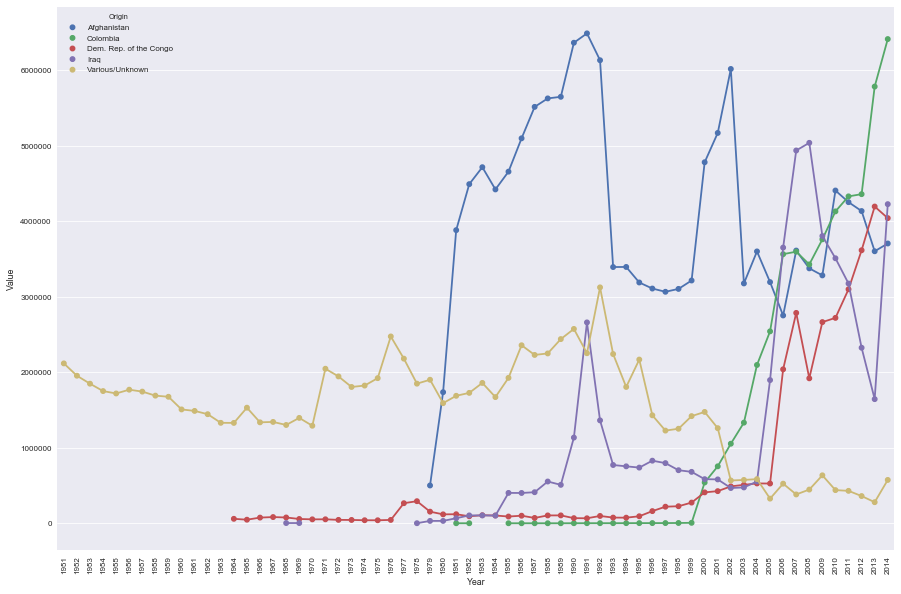

In [20]:
all_time['Year']=pd.to_datetime(all_time['Year'], format = '%Y').apply(lambda x:x.year)
all_time['Value']=pd.to_numeric(all_time['Value'])
top_overall_countries = all_time.groupby(['Origin']).sum().sort_values(by='Value',ascending=False)['Value'][0:5].index
top_all_cols = all_time[all_time['Origin'].isin(top_overall_countries)]

paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}                  
plt.figure(figsize=(15,10))
temp = top_all_cols.groupby(['Origin','Year']).sum().reset_index()
sns.pointplot(x='Year',y = 'Value',data=temp,fit_reg = False,hue = 'Origin',shade=True)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]), <a list of 55 Text xticklabel objects>)

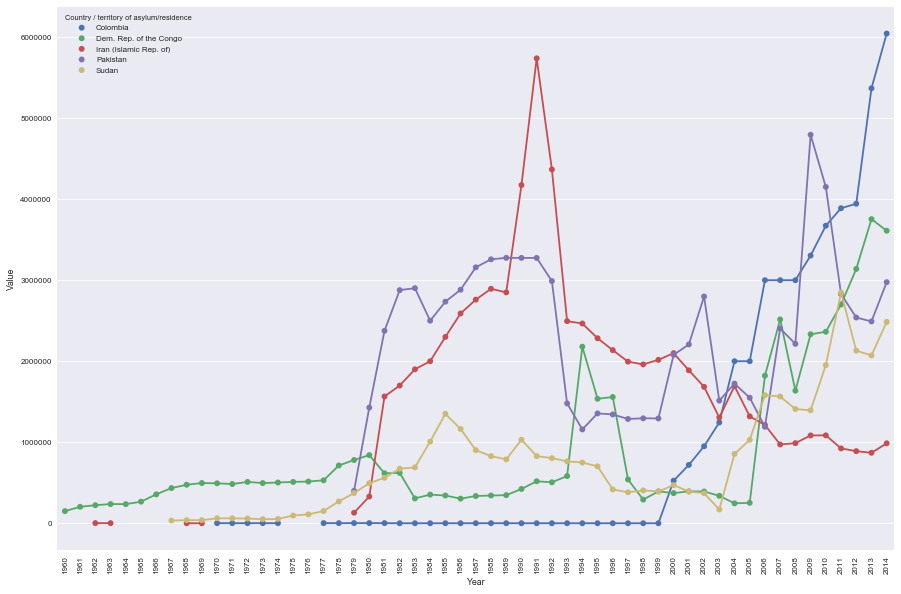

In [19]:
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}                  
sns.set_context("paper", rc = paper_rc)  
top_overall_countries = all_time.groupby(['Country / territory of asylum/residence']).sum().sort_values(by='Value',ascending=False)['Value'][0:5].index
top_all_cols = all_time[all_time['Country / territory of asylum/residence'].isin(top_overall_countries)]
plt.figure(figsize=(15,10))
temp = top_all_cols.groupby(['Country / territory of asylum/residence','Year']).sum().reset_index()
sns.pointplot(x='Year',y = 'Value',data=temp,fit_reg = False,
              hue = 'Country / territory of asylum/residence',shade=True,scatter_kws={"s": 10})
plt.xticks(rotation=90)

In [135]:
def plotting_ref(data,top_count,country_or_origin,title='Refugees'):
    paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}                  
    sns.set_context("paper", rc = paper_rc)  
    top_overall_countries = data.groupby(country_or_origin).sum().sort_values(by='Value',ascending=False)['Value'][0:top_count].index
    top_all_cols = data[data[country_or_origin].isin(top_overall_countries)]
    plt.figure(figsize=(15,10))
    temp = top_all_cols.groupby([country_or_origin,'Year']).sum().reset_index()
    sns.pointplot(x='Year',y = 'Value',data=temp,fit_reg = False,
                  hue = country_or_origin,shade=True,scatter_kws={"s": 10})
    plt.xticks(rotation=90)
    plt.title(title)
    return(top_overall_countries)

In [136]:
us_all_time = all_time[all_time['Country / territory of asylum/residence']=='United States of America']

Index(['Various/Unknown', 'Russian Federation', 'Viet Nam', 'El Salvador',
       'Bosnia and Herzegovina', 'China', 'Guatemala',
       'Lao People's Dem. Rep.', 'Somalia', 'Iran (Islamic Rep. of)'],
      dtype='object', name='Origin')

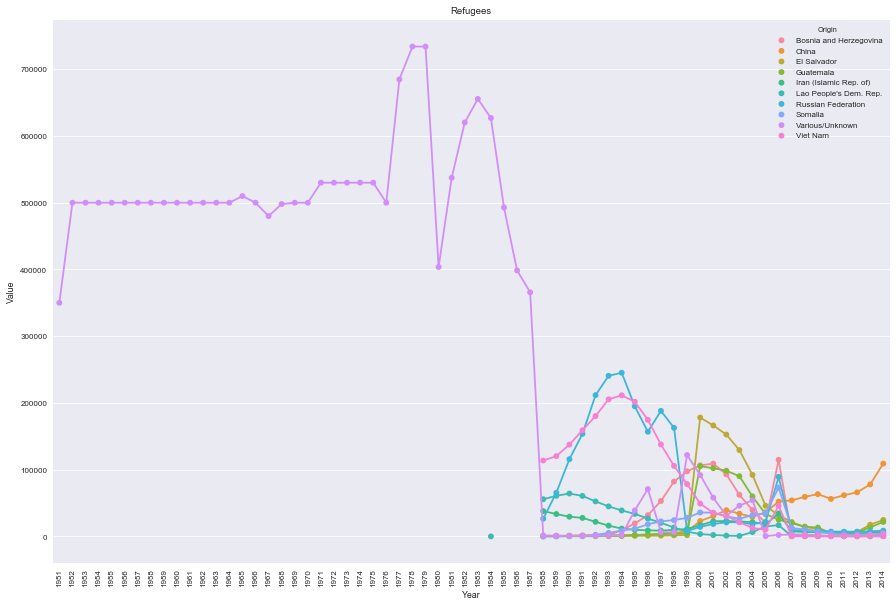

In [137]:
plotting_ref(us_all_time,10,'Origin')

## Lets get rid of Various/Unknown?

In [39]:
no_unknown =all_time[all_time['Origin'] !='Various/Unknown']

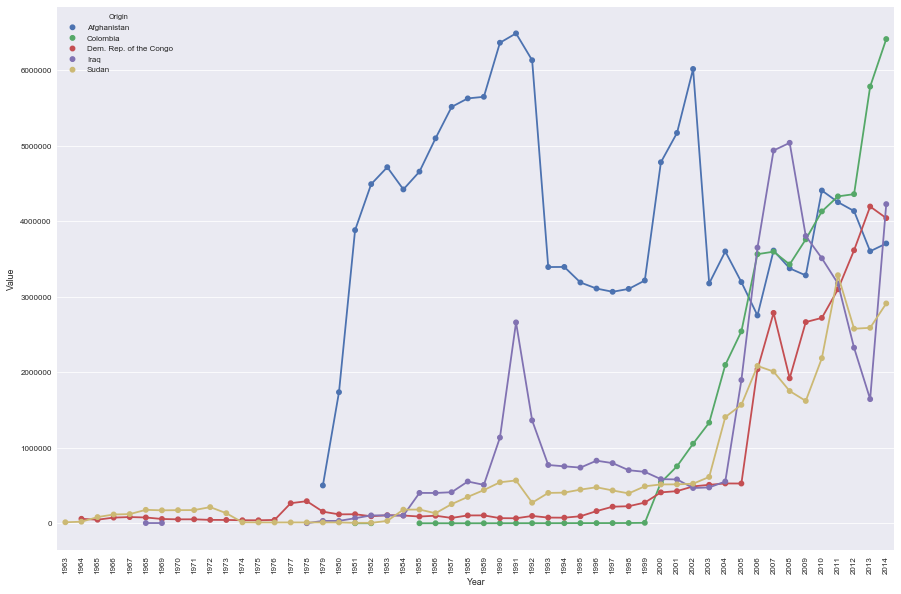

In [40]:
plotting_ref(no_unknown,5,'Origin')

In [55]:
mean_overall_time = all_time.groupby('Year').mean()
sum_overall_time = all_time.groupby('Year').sum()

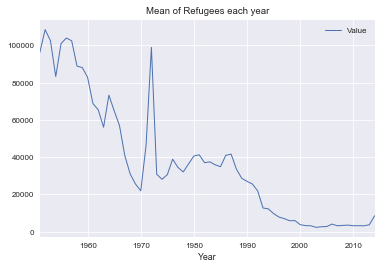

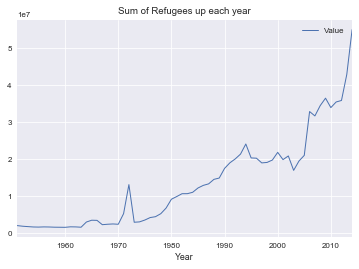

In [77]:
mean_overall_time.plot(title='Mean of Refugees each year')
sum_overall_time.plot(title='Sum of Refugees up each year')
plt.show()

## The mean is going down over time, but the sum per year is going up.

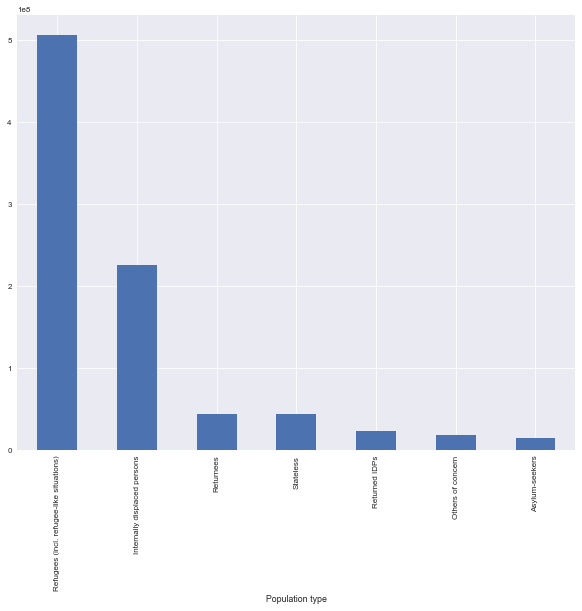

In [202]:
plt.figure(figsize=(10,8))
all_time.groupby('Population type').sum()['Value'].sort_values(ascending=False).plot(kind='bar')

# For all time in the dataset the highest population type appears to be Refugees.

In [86]:
all_time['Population type'].value_counts()

Refugees (incl. refugee-like situations)    86374
Asylum-seekers                              65688
Returnees                                    6480
Others of concern                             782
Stateless                                     650
Internally displaced persons                  416
Returned IDPs                                 202
Name: Population type, dtype: int64

In [106]:
us_all_time_2 = no_unknown[no_unknown['Country / territory of asylum/residence']=='United States of America']
temp2 = us_all_time_2.groupby(['Origin','Population type','Year'])['Value'].mean().reset_index()

In [125]:
p_types = list(set(temp2['Population type']))

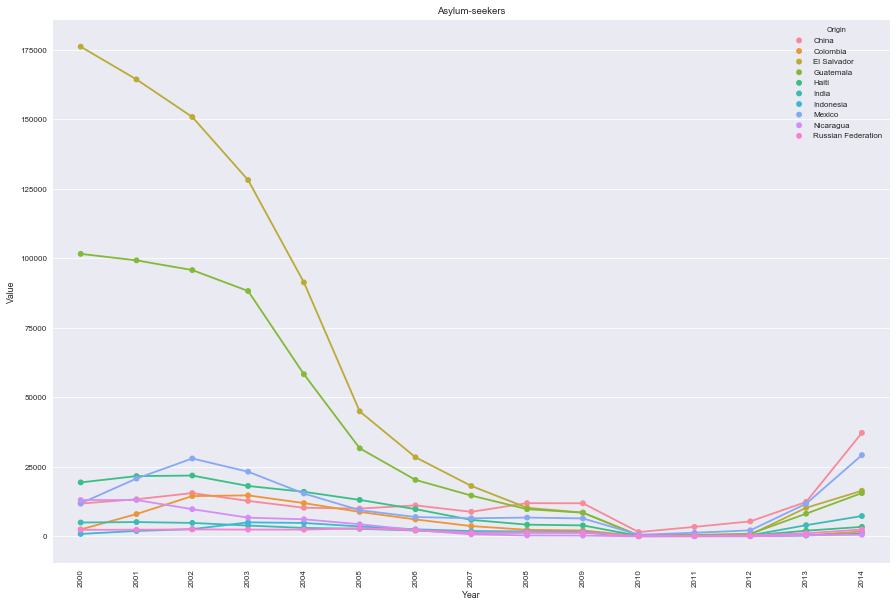

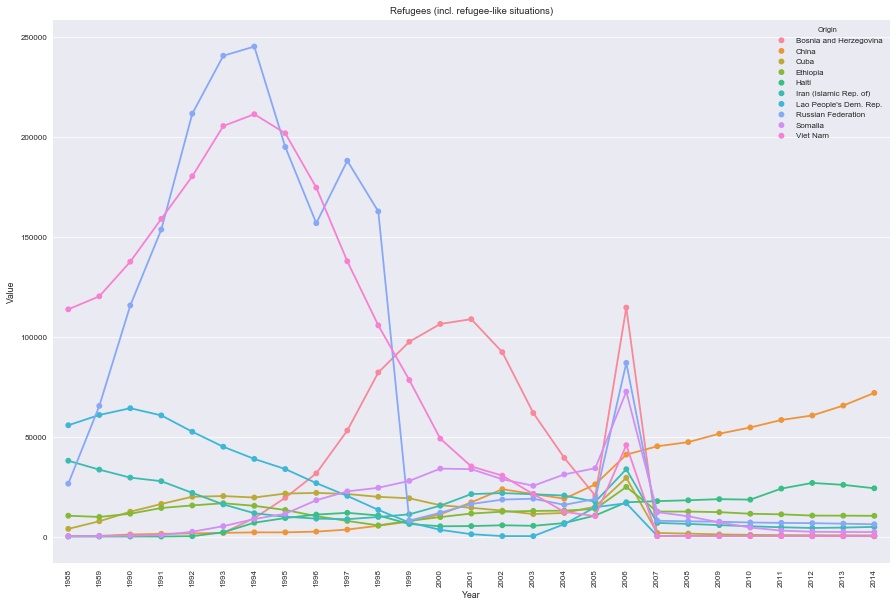

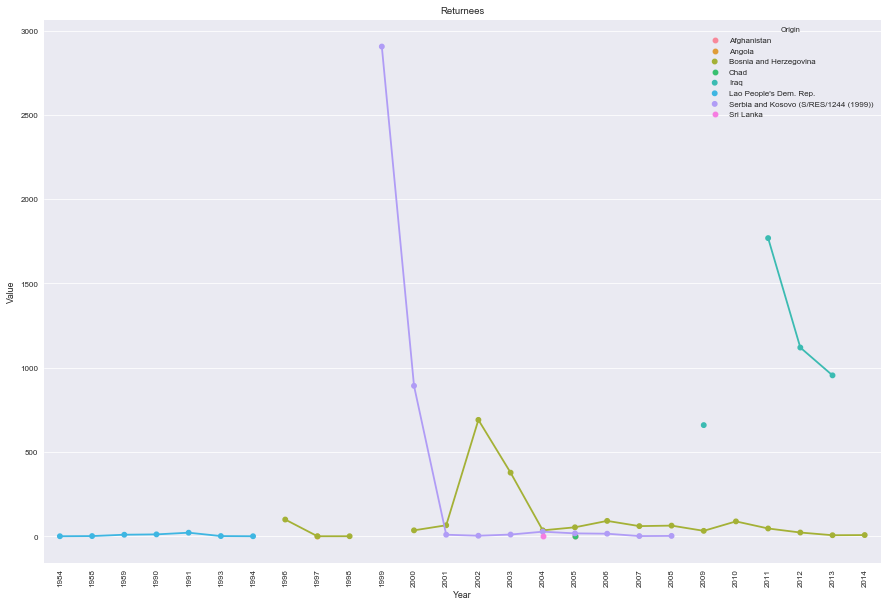

In [141]:
import time
for p in p_types:
    temp_3 = temp2[temp2['Population type'] == p]
    plotting_ref(temp_3,10,'Origin',p)

So far, overall Origins per population type follow the same trends. I wonder if it's more of a change in policy rather than worldwide issues.

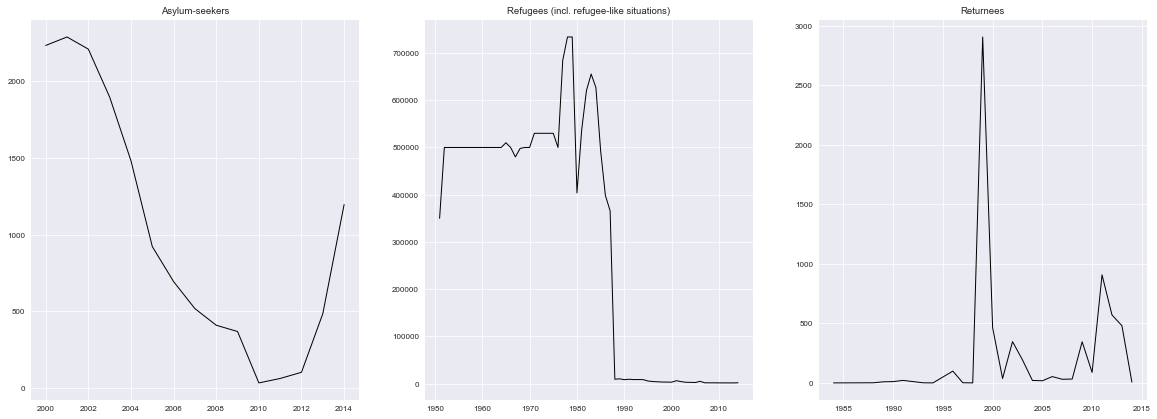

In [196]:
c = 1
plt.figure(figsize=(20,7))
for p in p_types:
    plt.subplot(1,3,c)
    temp = us_all_time[us_all_time['Population type'] == p]
    temp2 = temp.groupby(['Year']).mean().reset_index()
    plt.plot(temp2['Year'],temp2['Value'],color='black')
    plt.title(p)
    c+=1

One by one:

The asylum seekers have a dip around 2010 and a rise after that it rises in 2014.

Refugees are a little more chaotic in that they rate fluctuate wildly, but dip intensely around 1990.

Returnees peek sharply in 2000, and die down, but after 2000 there is a small peak around 2011-2014.


In [ ]:
# Plotting on map the lines

In [203]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

In [205]:
df_2 = pd.merge(us_all_time,df,left_on = 'Origin',right_on='COUNTRY')

In [220]:
code_df = df_2.groupby(['Origin','CODE']).sum().reset_index()

In [247]:
countries = pd.read_csv('countries.csv')

In [249]:
countries.head()

,Unnamed: 0,country,latitude,longitude,name
0,0,AD,42.546245,1.601554,Andorra
1,1,AE,23.424076,53.847818,United Arab Emirates
2,2,AF,33.939110,67.709953,Afghanistan
3,3,AG,17.060816,-61.796428,Antigua and Barbuda
4,4,AI,18.220554,-63.068615,Anguilla


In [255]:
codes_lat_lon_df = pd.merge(code_df,countries,left_on='Origin',right_on='name')

In [265]:
codes_lat_lon_df['USA_lat']=39.828175
codes_lat_lon_df['USA_lon']= -98.5795

In [258]:
codes_lat_lon_df.columns

Index(['Origin', 'CODE', 'Year', 'Value', 'GDP (BILLIONS)', 'Unnamed: 0',
       'country', 'latitude', 'longitude', 'name'],
      dtype='object')

In [325]:
import plotly.plotly as py
import pandas as pd

data = [ dict(
        type = 'choropleth',
        locations = codes_lat_lon_df['CODE'],
        z = codes_lat_lon_df['Value'],
        text = codes_lat_lon_df['Origin'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = 'Counts ',
            title = 'Displaced Persons'),
      ) ]


paths = []
for i in range( len( codes_lat_lon_df ) ):
    paths.append(
        dict(
            type = 'scattergeo',
            locationmode = 'worldwide',
            lon = [ codes_lat_lon_df['longitude'][i], codes_lat_lon_df['USA_lon'][i] ],
            lat = [ codes_lat_lon_df['latitude'][i], codes_lat_lon_df['USA_lat'][i] ],
            mode = 'lines',
            line = dict(
                width = 2,
                color = 'green',
            ),
            opacity = float(codes_lat_lon_df['Value'][i])/float(codes_lat_lon_df['Value'].max()),
            text = codes_lat_lon_df['Origin'][i]
        )
    )

layout = dict(
    title = 'Origin',
    showlegend = False,
    geo = dict(
        scope='worldwide',
        showframe = True,
        showland=True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
        showcoastlines = True,
    projection = dict( type="mercatorial" )
    )
)

fig = dict( data=paths+data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

The plot above shows countries of origin that immigrated to the united states. This includes all types of displaced populations. The plot also shows the counts of displanced person by the origin as well over the range of 1950 to 2014. Hovering over a country shows the population of origins refugee count. The green lines should show the country of origin as well, but seem to be selective about which ones they show, this might be a processing issue or something wrong with the code itself.